In [2]:
import numpy as np 
import pandas as pd 
import scipy.stats as st 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
data2000 = pd.read_csv('US2000.csv')
data2000['date'] = pd.to_datetime(data2000['date'], format='%d/%m/%Y')
data2000['PRC'][data2000['PRC'] < 0] *= -1
data2000['AdjP'] = data2000['PRC'] / data2000['CFACPR']
data2000['Ret'] = np.log(data2000['AdjP'] / data2000['AdjP'].shift())
data2000

/Users/Chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Chris/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,PERMNO,date,PERMCO,PRC,VOL,CFACPR,sprtrn,AdjP,Ret
0,10001,2000-01-03,7953,8.56250,1721.0,1.5,-0.009549,5.708333,NaN
1,10001,2000-01-04,7953,8.43750,1080.0,1.5,-0.038345,5.625000,-0.014706
2,10001,2000-01-05,7953,8.56250,1711.0,1.5,0.001922,5.708333,0.014706
3,10001,2000-01-06,7953,8.50000,580.0,1.5,0.000956,5.666667,-0.007326
4,10001,2000-01-07,7953,8.43750,1406.0,1.5,0.027090,5.625000,-0.007380
...,...,...,...,...,...,...,...,...,...
35945272,93436,2019-12-24,53453,425.25000,8186207.0,1.0,-0.000195,425.250000,0.014281
35945273,93436,2019-12-26,53453,430.94000,10617605.0,1.0,0.005128,430.940000,0.013292
35945274,93436,2019-12-27,53453,430.38000,9936455.0,1.0,0.000034,430.380000,-0.001300
35945275,93436,2019-12-30,53453,414.70001,12563586.0,1.0,-0.005781,414.700010,-0.037113


In [4]:
len(set(data2000['PERMNO'])), len(set(data2000['PERMCO']))

(18381, 15090)

In [5]:
prices = data2000.pivot('date', 'PERMNO', 'AdjP')

In [6]:
sum(prices.isna().sum()) / (np.shape(prices)[0]*np.shape(prices)[1])

0.6168160213920307

In [7]:
rets = np.log(prices/prices.shift())
rets

/Users/Chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


PERMNO,10001,10002,10009,10012,10016,10019,10025,10026,10028,10032,...,93427,93428,93429,93430,93431,93432,93433,93434,93435,93436
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.014706,0.040822,-0.144250,-0.089856,-0.086433,0.031351,0.000000,-0.088107,-0.064539,-0.027098,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,0.014706,-0.040822,0.072722,0.089856,0.034133,-0.050644,-0.022990,0.057524,0.064539,-0.000743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,-0.007326,0.020619,-0.047188,-0.064539,-0.044604,0.000000,-0.028836,0.003101,-0.021053,0.001485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,-0.007380,0.059423,0.024898,0.008299,0.010471,-0.095310,0.071826,0.003091,-0.032435,0.007391,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003764,0.000000,0.001933,...,0.005882,NaN,0.005648,NaN,NaN,NaN,NaN,-0.013668,NaN,0.014281
2019-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003066,-0.002882,-0.002579,...,0.009371,NaN,0.000672,NaN,NaN,NaN,NaN,-0.037388,NaN,0.013292
2019-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002414,-0.013950,-0.006736,...,-0.012772,NaN,-0.001766,NaN,NaN,NaN,NaN,-0.058841,NaN,-0.001300


In [8]:
5031*18381, sum((abs(rets[rets.rolling(10, min_periods=10).max().isna()]) > 0.6).sum())

(92474811, 156)

In [9]:
sum((abs(rets)>0.6).sum())

6468

In [10]:
rets[abs(rets[rets.rolling(10, min_periods=10).max().isna()]) > 1]

PERMNO,10001,10002,10009,10012,10016,10019,10025,10026,10028,10032,...,93427,93428,93429,93430,93431,93432,93433,93434,93435,93436
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
rets

PERMNO,10001,10002,10009,10012,10016,10019,10025,10026,10028,10032,...,93427,93428,93429,93430,93431,93432,93433,93434,93435,93436
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.014706,0.040822,-0.144250,-0.089856,-0.086433,0.031351,0.000000,-0.088107,-0.064539,-0.027098,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,0.014706,-0.040822,0.072722,0.089856,0.034133,-0.050644,-0.022990,0.057524,0.064539,-0.000743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,-0.007326,0.020619,-0.047188,-0.064539,-0.044604,0.000000,-0.028836,0.003101,-0.021053,0.001485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,-0.007380,0.059423,0.024898,0.008299,0.010471,-0.095310,0.071826,0.003091,-0.032435,0.007391,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003764,0.000000,0.001933,...,0.005882,NaN,0.005648,NaN,NaN,NaN,NaN,-0.013668,NaN,0.014281
2019-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003066,-0.002882,-0.002579,...,0.009371,NaN,0.000672,NaN,NaN,NaN,NaN,-0.037388,NaN,0.013292
2019-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002414,-0.013950,-0.006736,...,-0.012772,NaN,-0.001766,NaN,NaN,NaN,NaN,-0.058841,NaN,-0.001300


In [62]:
rets.to_csv('rets.csv')

In [55]:
list(rets.isna().sum().sort_values())[100]

1

In [63]:
top1000 = rets[rets.columns[rets.isna().sum() <= rets.isna().sum().sort_values().iloc[1000]]]
top1000

PERMNO,10026,10032,10044,10065,10104,10107,10138,10145,10182,10200,...,90377,90537,90756,90983,91287,91556,91855,92655,92690,92807
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.088107,-0.027098,0.017192,-0.013170,-0.092510,-0.034364,-0.030716,-0.017798,-0.036192,0.000000,...,-0.065383,-0.010299,-0.017700,-0.012579,-0.189242,-0.044125,0.017880,-0.012873,-0.015152,0.010363
2000-01-05,0.057524,-0.000743,0.000000,-0.007605,-0.054261,0.010489,-0.001837,-0.013560,-0.037551,-0.020619,...,-0.006780,-0.012500,0.026433,0.004211,0.099091,0.022306,0.012579,-0.002358,0.000000,0.020409
2000-01-06,0.003101,0.001485,-0.095310,0.000000,-0.060625,-0.034072,0.028988,0.019156,-0.039017,0.020619,...,0.059423,0.059020,0.006501,-0.008439,-0.019048,-0.112741,-0.030459,0.035946,0.022642,-0.010152
2000-01-07,0.003091,0.007391,0.117783,0.003810,0.074015,0.012984,-0.007168,0.052186,0.041564,0.078472,...,-0.059423,0.027292,0.048482,0.000000,0.074108,-0.012423,0.005141,0.110926,-0.007491,0.015190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,-0.003764,0.001933,0.015660,0.001258,-0.005040,-0.000191,0.004758,-0.000680,-0.000488,0.001724,...,-0.009836,0.079407,-0.005466,-0.006797,0.037478,0.008024,0.003747,-0.001866,-0.007638,-0.001179
2019-12-26,0.003066,-0.002579,0.007739,0.002511,0.002430,0.008163,0.005468,0.003228,0.000070,0.001399,...,-0.003576,0.022642,0.001264,0.033219,0.008684,0.001649,0.005222,0.003761,-0.001279,0.011723
2019-12-27,0.002414,-0.006736,0.001892,-0.003769,-0.002055,0.001826,-0.000407,-0.002264,0.000209,-0.008422,...,0.000551,-0.061558,-0.000632,0.015896,0.000000,-0.003040,-0.002235,0.001082,-0.001280,-0.011723


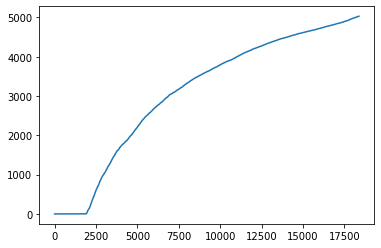

In [64]:
plt.plot(list(rets.isna().sum().sort_values()))

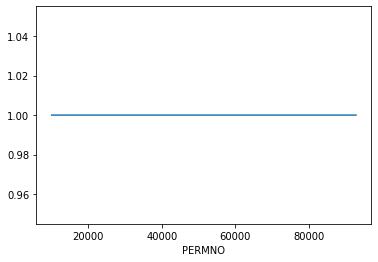

In [65]:
top1000.isna().sum().sort_values().plot()

In [66]:
top1000.to_csv('us1000.csv')